Two-qubit quantum circuit with Qiskit

In [136]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Circuit Design

2 qubits, 2 classical bits for measurement

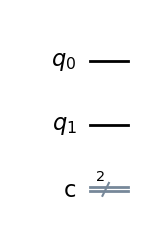

In [137]:
qc = QuantumCircuit(2, 2) 

# Visualize the circuit
qc.draw('mpl')

Applying ***Hadamard gates*** to both qubits

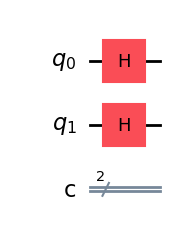

In [138]:
qc.h(0)
qc.h(1)

qc.draw('mpl')

Adding a ***CNOT gate*** to entangle the two qubits, with qubit 0 as control and qubit 1 as target

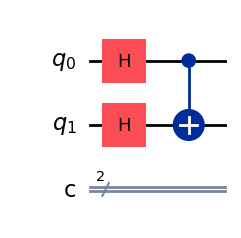

In [139]:
qc.cx(0, 1)

qc.draw('mpl')

Measuring the qubits to obtain the final measurement outcomes

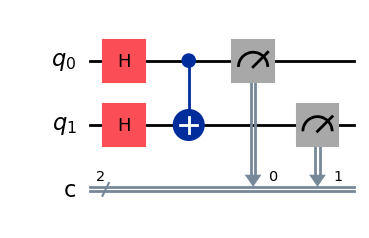

In [140]:
# Measure both qubits and store the result in classical bits
qc.measure([0, 1], [0, 1])

qc.draw('mpl') 

# Circuit simulation

In [141]:
num_shots = 1024

# Simulate the circuit using the qasm simulator
simulator = Aer.get_backend('qasm_simulator')

circuit = transpile(qc, simulator)
job = simulator.run(circuit, shots=num_shots)

In [142]:
result = job.result()

# Get counts of the results
counts = result.get_counts(qc)

print(f'counts: {counts}')

counts: {'00': 256, '10': 257, '11': 230, '01': 281}


# Visualize results

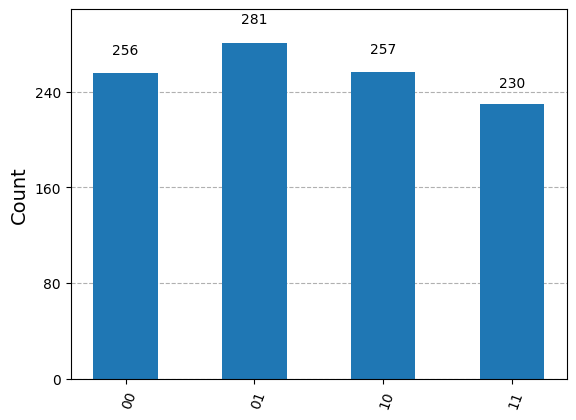

In [143]:
plot_histogram(counts)

Convert shots to probabilities

In [146]:
total_shots = sum(counts.values())
probabilities = {outcome: count/total_shots for outcome, count in counts.items()}

print(f'probabilities: {probabilities}')

probabilities: {'00': 0.25, '10': 0.2509765625, '11': 0.224609375, '01': 0.2744140625}


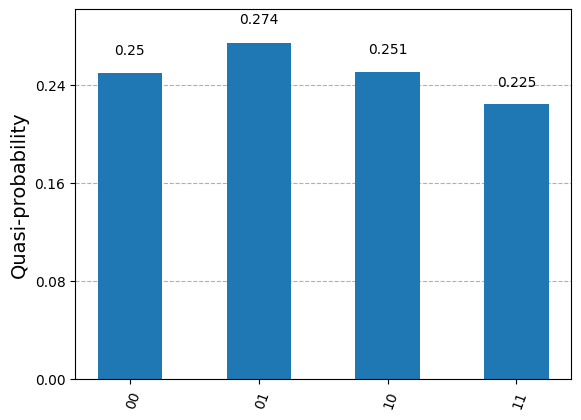

In [145]:
plot_histogram(probabilities)

## Results

- The simulation was executed using the Qiskit Aer simulator with 1024 shots. 
- The expected results show that the qubits are entangled, as evidenced by the correlated measurement outcomes.
- The histogram shows that the measurement results are predominantly `00` and `11`, indicating that the qubits are entangled.
